In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
#from seiscm import seismic

In [2]:
with open("./datasets/seismic/P_data/ep0000911.bin", 'rb') as fh:
    loaded_array = np.frombuffer(fh.read(), dtype="float32")
    
print (loaded_array)

[ 0.          0.          0.         ... -0.01310156  0.05555963
  0.01257256]


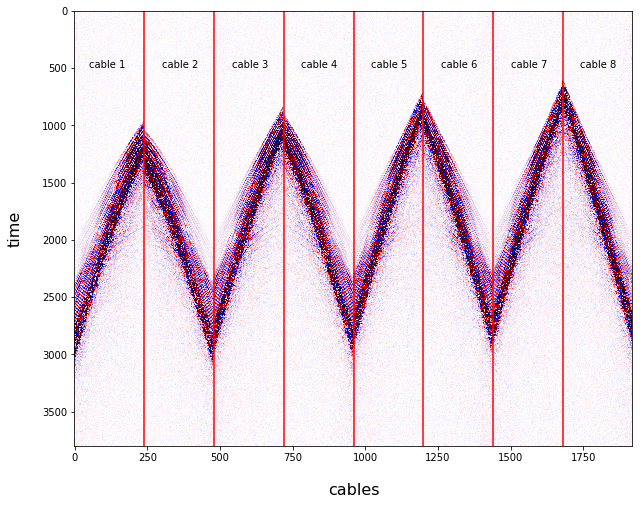

In [16]:
img = loaded_array.reshape(1920, -1)
img = img.transpose()
img = img[0:3800, :]
plt.figure(figsize=(10,8))
plt.xlabel('cables', fontsize=16, labelpad=20)
plt.ylabel('time', fontsize=16, labelpad=20)
plt.axvline(x=240, color='r')
plt.text(50, 500, 'cable 1')
plt.axvline(x=480, color='r')
plt.text(300, 500, 'cable 2')
plt.axvline(x=720, color='r')
plt.text(540, 500, 'cable 3')
plt.axvline(x=960, color='r')
plt.text(780, 500, 'cable 4')
plt.axvline(x=1200, color='r')
plt.text(1020, 500, 'cable 5')
plt.axvline(x=1440, color='r')
plt.text(1260, 500, 'cable 6')
plt.axvline(x=1680, color='r')
plt.text(1500, 500, 'cable 7')
plt.text(1740, 500, 'cable 8')
plt.imshow(img, vmin=-3, vmax=3, cmap=plt.cm.seismic, aspect='auto')

(4000, 240)


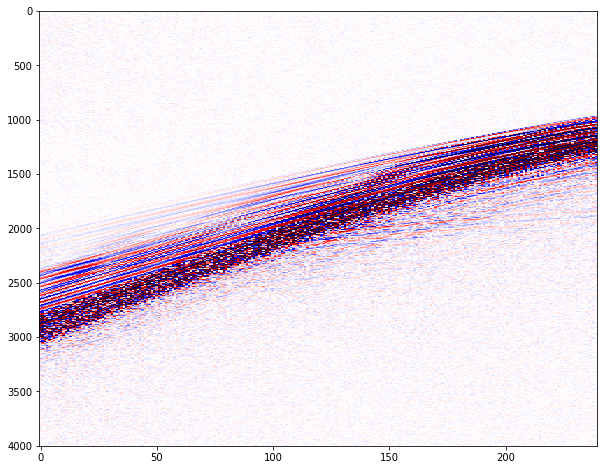

In [160]:
# test
img_split = img[:4000, :240]
print(img_split.shape)
plt.figure(figsize=(10,8))
plt.imshow(img_split, vmin=-3, vmax=3, cmap=plt.cm.seismic, aspect='auto')

(900, 240)


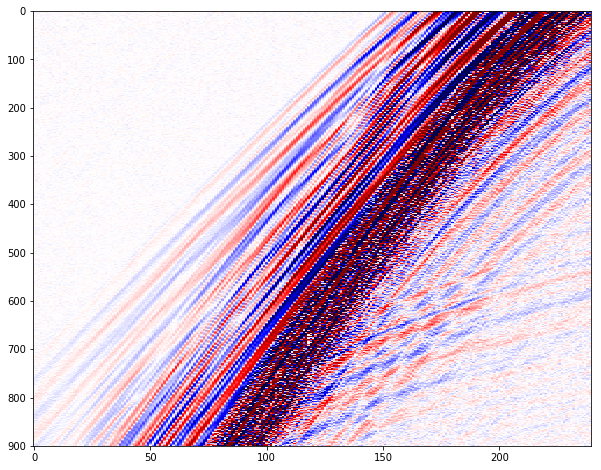

In [170]:
# test
img_split = img[1300:2200, :240]
print(img_split.shape)
plt.figure(figsize=(10,8))
plt.imshow(img_split, vmin=-3, vmax=3, cmap=plt.cm.seismic, aspect='auto')

In [5]:
def split(img):
    img_split1 = img[:3800, :240]
    img_split2 = img[:3800, 240:480]
    img_split3 = img[:3800, 480:720]
    img_split4 = img[:3800, 720:960]
    img_split5 = img[:3800, 960:1200]
    img_split6 = img[:3800, 1200:1440]
    img_split7 = img[:3800, 1440:1680]
    img_split8 = img[:3800, 1680:1920]
    
    #plt.figure(figsize=(20, 10))
    #for i in range(8):
     #   plt.subplot(2, 4, i+1)
     #   plt.imshow(eval('img_split'+str(i+1)), cmap=plt.cm.gray, aspect='auto')
    #plt.show()
    return img_split1, img_split2, img_split3, img_split4, img_split5, img_split6, img_split7, img_split8

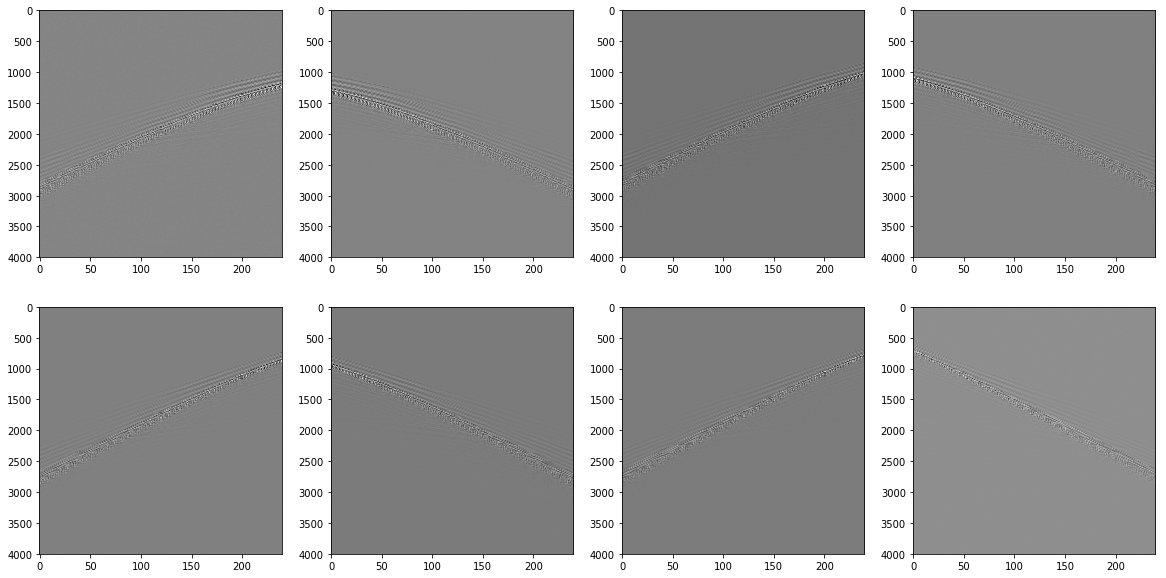

In [6]:
img_split1,img_split2,img_split3,img_split4,img_split5,img_split6,img_split7,img_split8 = split(img)

In [9]:
img_split1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.06552792,  0.        , -0.08172649, ...,  0.05449454,
         0.13105583, -0.03093016],
       [ 0.01257819, -0.13673335,  0.01257819, ...,  0.08125794,
         0.08492374, -0.03824624],
       [-0.04192159, -0.033006  ,  0.03511277, ..., -0.00104766,
         0.08543086, -0.03039544]], dtype=float32)

In [ ]:
# merge version without random crop
# split P data
directory = './datasets/seismic/P_data'
directory2 = './datasets/seismic/P_split_data_nocrop/train'
directory3 = './datasets/seismic/P_split_data_nocrop/test'

# count images
n = 1

# iterate over all the P_data binary file
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".bin"):
        print(os.path.join(directory, filename))
        # load data
        with open(os.path.join(directory, filename), 'rb') as fh:
            loaded_array = np.frombuffer(fh.read(), dtype="float32")
        # data processing
        img = loaded_array.reshape(1920, -1)
        img = img.transpose()

        img1,img2,img3,img4,img5,img6,img7,img8 = split(img)
        # first 150 images for training
        if n < 150:
            output = str(n) + '_img1_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img1, 240, 240),delimiter=",")
        
            output = str(n) + '_img2_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img2, 240, 240),delimiter=",")
        
            output = str(n) + '_img3_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img3, 240, 240),delimiter=",")
        
            output = str(n) + '_img4_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img4, 240, 240),delimiter=",")
        
            output = str(n) + '_img5_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img5, 240, 240),delimiter=",")
        
            output = str(n) + '_img6_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img6, 240, 240),delimiter=",")
        
            output = str(n) + '_img7_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img7, 240, 240),delimiter=",")
        
            output = str(n) + '_img8_'+ str(k) + '.txt'
            np.savetxt(os.path.join(directory2, output),randomCrop(img8, 240, 240),delimiter=",")
        
            fh.close()
            n += 1
            
        else:
            # the rest images for test
            output = str(n) + '_img1'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img1,delimiter=",")
        
            output = str(n) + '_img2'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img2,delimiter=",")
        
            output = str(n) + '_img3'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img3,delimiter=",")
        
            output = str(n) + '_img4'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img4,delimiter=",")
        
            output = str(n) + '_img5'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img5,delimiter=",")
        
            output = str(n) + '_img6'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img6,delimiter=",")
        
            output = str(n) + '_img7'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img7,delimiter=",")
        
            output = str(n) + '_img8'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img8,delimiter=",")
        
            fh.close()
            n += 1
            
        continue
    else:
        continue

In [7]:
def randomCrop(data, width, height):
    assert width <= data.shape[0]
    assert height <= data.shape[1]
    crop_w = random.randint(0,data.shape[0] - width)

    crop_h = random.randint(0,data.shape[1] - height)

    data = data[crop_w:crop_w+width, crop_h:crop_h+height]
    #data2 = data2[crop_w:crop_w+width, crop_h:crop_h+height]
    return data #, data2

In [8]:
# merge version with random crop
# split P data
directory = './datasets/seismic/P_data'
directory2 = './datasets/seismic/P_split_data/train'
directory3 = './datasets/seismic/P_split_data/test'

# count images
n = 1

# iterate over all the P_data binary file
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".bin"):
        print(os.path.join(directory, filename))
        # load data
        with open(os.path.join(directory, filename), 'rb') as fh:
            loaded_array = np.frombuffer(fh.read(), dtype="float32")
        # data processing
        img = loaded_array.reshape(1920, -1)
        img = img.transpose()

        img1,img2,img3,img4,img5,img6,img7,img8 = split(img)
        # first 150 images for training
        if n < 150:
            
            for k in range(16):
                output = str(n) + '_img1_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img1, 240, 240),delimiter=",")
        
                output = str(n) + '_img2_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img2, 240, 240),delimiter=",")
        
                output = str(n) + '_img3_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img3, 240, 240),delimiter=",")
        
                output = str(n) + '_img4_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img4, 240, 240),delimiter=",")
        
                output = str(n) + '_img5_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img5, 240, 240),delimiter=",")
        
                output = str(n) + '_img6_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img6, 240, 240),delimiter=",")
        
                output = str(n) + '_img7_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img7, 240, 240),delimiter=",")
        
                output = str(n) + '_img8_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img8, 240, 240),delimiter=",")
        
            fh.close()
            n += 1
            
        else:
            # the rest images for test
            output = str(n) + '_img1'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img1,delimiter=",")
        
            output = str(n) + '_img2'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img2,delimiter=",")
        
            output = str(n) + '_img3'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img3,delimiter=",")
        
            output = str(n) + '_img4'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img4,delimiter=",")
        
            output = str(n) + '_img5'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img5,delimiter=",")
        
            output = str(n) + '_img6'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img6,delimiter=",")
        
            output = str(n) + '_img7'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img7,delimiter=",")
        
            output = str(n) + '_img8'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img8,delimiter=",")
        
            fh.close()
            n += 1
            
        continue
    else:
        continue

./datasets/seismic/P_data/ep0000911.bin
./datasets/seismic/P_data/ep0000913.bin
./datasets/seismic/P_data/ep0000915.bin
./datasets/seismic/P_data/ep0000917.bin
./datasets/seismic/P_data/ep0000919.bin
./datasets/seismic/P_data/ep0000921.bin
./datasets/seismic/P_data/ep0000923.bin
./datasets/seismic/P_data/ep0000925.bin
./datasets/seismic/P_data/ep0000927.bin
./datasets/seismic/P_data/ep0000929.bin
./datasets/seismic/P_data/ep0000931.bin
./datasets/seismic/P_data/ep0000933.bin
./datasets/seismic/P_data/ep0000935.bin
./datasets/seismic/P_data/ep0000937.bin
./datasets/seismic/P_data/ep0000939.bin
./datasets/seismic/P_data/ep0000941.bin
./datasets/seismic/P_data/ep0000943.bin
./datasets/seismic/P_data/ep0000945.bin
./datasets/seismic/P_data/ep0000947.bin
./datasets/seismic/P_data/ep0000949.bin
./datasets/seismic/P_data/ep0000951.bin
./datasets/seismic/P_data/ep0000953.bin
./datasets/seismic/P_data/ep0000955.bin
./datasets/seismic/P_data/ep0000957.bin
./datasets/seismic/P_data/ep0000959.bin


./datasets/seismic/P_data/ep0001321.bin
./datasets/seismic/P_data/ep0001323.bin
./datasets/seismic/P_data/ep0001325.bin
./datasets/seismic/P_data/ep0001327.bin
./datasets/seismic/P_data/ep0001329.bin
./datasets/seismic/P_data/ep0001331.bin
./datasets/seismic/P_data/ep0001333.bin
./datasets/seismic/P_data/ep0001335.bin
./datasets/seismic/P_data/ep0001337.bin
./datasets/seismic/P_data/ep0001339.bin
./datasets/seismic/P_data/ep0001341.bin
./datasets/seismic/P_data/ep0001343.bin
./datasets/seismic/P_data/ep0001345.bin
./datasets/seismic/P_data/ep0001347.bin
./datasets/seismic/P_data/ep0001349.bin
./datasets/seismic/P_data/ep0001351.bin
./datasets/seismic/P_data/ep0001353.bin
./datasets/seismic/P_data/ep0001355.bin
./datasets/seismic/P_data/ep0001357.bin
./datasets/seismic/P_data/ep0001359.bin
./datasets/seismic/P_data/ep0001361.bin
./datasets/seismic/P_data/ep0001363.bin
./datasets/seismic/P_data/ep0001365.bin
./datasets/seismic/P_data/ep0001367.bin
./datasets/seismic/P_data/ep0001369.bin


In [4]:
# test 
with open("./datasets/seismic/P_split_data_nocrop/train/ep0000911_1.txt") as f:
    data = np.genfromtxt(f, delimiter=',', dtype='float64').astype('float32')

print(data)

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 4.3152785e-04 -1.6970191e-03  7.8790192e-04 ... -6.0032069e-04
   1.1442760e-03 -1.8760020e-05]
 [-2.2316165e-03 -2.2885583e-03 -1.4065726e-03 ...  5.5336114e-04
   7.3175726e-04 -1.8759607e-05]
 [-7.1260333e-04  1.3125947e-03 -1.5475053e-03 ... -3.0014705e-04
   1.1253623e-04  6.5652443e-05]]


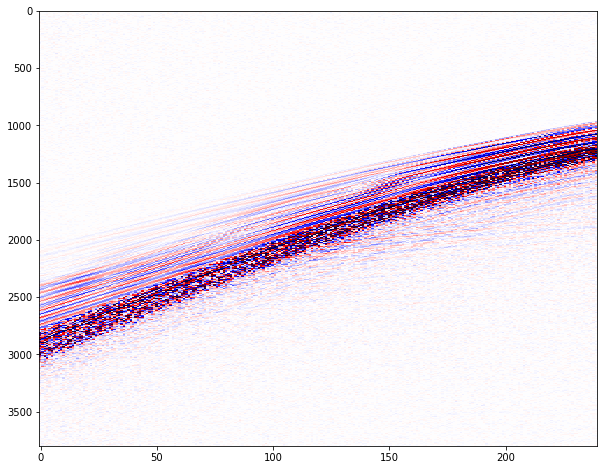

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(data, vmin=-0.1, vmax=0.1, cmap=plt.cm.seismic, aspect='auto')

In [8]:
with open("./datasets/seismic/Z_split_data_nocrop/train/ep0000911_1.txt") as f:
    data = np.genfromtxt(f, delimiter=',', dtype='float64').astype('float32')
    
print(data)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.0027253   0.00230694  0.00293533 ... -0.00104845  0.00209691
   0.00398379]
 [ 0.00293548  0.00125782  0.0020958  ... -0.00083883  0.00293548
   0.00398508]
 [ 0.00377317  0.00272582  0.00209639 ... -0.00041941  0.00146781
   0.00293563]]


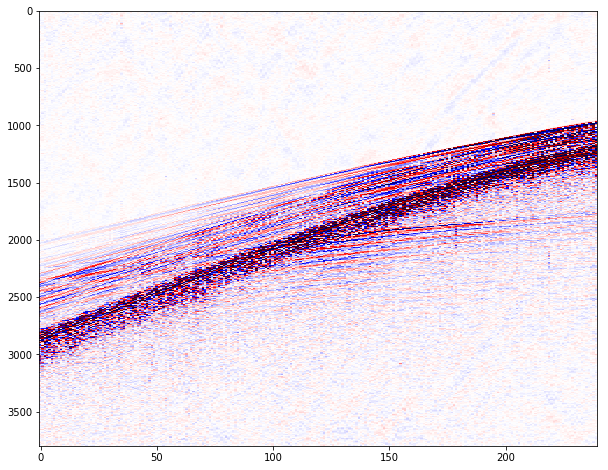

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(data, vmin=-0.1, vmax=0.1, cmap=plt.cm.seismic, aspect='auto')

In [9]:
# merge version
# split Z data
directory = './datasets/seismic/Z_data'
directory2 = './datasets/seismic/Z_split_data/train'
directory3 = './datasets/seismic/Z_split_data/test'

# count image
n = 1

# iterate over all the P_data binary file
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".bin"):
        print(os.path.join(directory, filename))
        # load data
        with open(os.path.join(directory, filename), 'rb') as fh:
            loaded_array = np.frombuffer(fh.read(), dtype="float32")
        # data processing
        img = loaded_array.reshape(1920, -1)
        img = img.transpose()
        # plot
        #plt.figure(figsize=(10,8))
        #plt.imshow(img, cmap=plt.cm.gray, aspect='auto')
        img1,img2,img3,img4,img5,img6,img7,img8 = split(img)

        if n < 150:
            
            for k in range(16):
                output = str(n) + '_img1_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img1, 240, 240),delimiter=",")
        
                output = str(n) + '_img2_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img2, 240, 240),delimiter=",")
        
                output = str(n) + '_img3_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img3, 240, 240),delimiter=",")
        
                output = str(n) + '_img4_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img4, 240, 240),delimiter=",")
        
                output = str(n) + '_img5_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img5, 240, 240),delimiter=",")
        
                output = str(n) + '_img6_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img6, 240, 240),delimiter=",")
        
                output = str(n) + '_img7_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img7, 240, 240),delimiter=",")
        
                output = str(n) + '_img8_'+ str(k) + '.txt'
                np.savetxt(os.path.join(directory2, output),randomCrop(img8, 240, 240),delimiter=",")
        
            fh.close()
            n += 1
            
        else:
            # the rest images for test
            output = str(n) + '_img1'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img1,delimiter=",")
        
            output = str(n) + '_img2'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img2,delimiter=",")
        
            output = str(n) + '_img3'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img3,delimiter=",")
        
            output = str(n) + '_img4'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img4,delimiter=",")
        
            output = str(n) + '_img5'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img5,delimiter=",")
        
            output = str(n) + '_img6'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img6,delimiter=",")
        
            output = str(n) + '_img7'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img7,delimiter=",")
        
            output = str(n) + '_img8'+ '.txt'
            np.savetxt(os.path.join(directory3, output),img8,delimiter=",")
        
            fh.close()
            n += 1
            
        continue
    else:
        continue

./datasets/seismic/Z_data/ep0000010.bin
./datasets/seismic/Z_data/ep0000030.bin
./datasets/seismic/Z_data/ep0000050.bin
./datasets/seismic/Z_data/ep0000070.bin
./datasets/seismic/Z_data/ep0000090.bin
./datasets/seismic/Z_data/ep0000110.bin
./datasets/seismic/Z_data/ep0000130.bin
./datasets/seismic/Z_data/ep0000150.bin
./datasets/seismic/Z_data/ep0000170.bin
./datasets/seismic/Z_data/ep0000190.bin
./datasets/seismic/Z_data/ep0000210.bin
./datasets/seismic/Z_data/ep0000230.bin
./datasets/seismic/Z_data/ep0000250.bin
./datasets/seismic/Z_data/ep0000270.bin
./datasets/seismic/Z_data/ep0000290.bin
./datasets/seismic/Z_data/ep0000310.bin
./datasets/seismic/Z_data/ep0000330.bin
./datasets/seismic/Z_data/ep0000350.bin
./datasets/seismic/Z_data/ep0000370.bin
./datasets/seismic/Z_data/ep0000390.bin
./datasets/seismic/Z_data/ep0000410.bin
./datasets/seismic/Z_data/ep0000430.bin
./datasets/seismic/Z_data/ep0000450.bin
./datasets/seismic/Z_data/ep0000470.bin
./datasets/seismic/Z_data/ep0000490.bin


./datasets/seismic/Z_data/ep0004110.bin
./datasets/seismic/Z_data/ep0004130.bin
./datasets/seismic/Z_data/ep0004150.bin
./datasets/seismic/Z_data/ep0004170.bin
./datasets/seismic/Z_data/ep0004190.bin
./datasets/seismic/Z_data/ep0004210.bin
./datasets/seismic/Z_data/ep0004230.bin
./datasets/seismic/Z_data/ep0004250.bin
./datasets/seismic/Z_data/ep0004270.bin
./datasets/seismic/Z_data/ep0004290.bin
./datasets/seismic/Z_data/ep0004310.bin
./datasets/seismic/Z_data/ep0004330.bin
./datasets/seismic/Z_data/ep0004350.bin
./datasets/seismic/Z_data/ep0004370.bin
./datasets/seismic/Z_data/ep0004390.bin
./datasets/seismic/Z_data/ep0004410.bin
./datasets/seismic/Z_data/ep0004430.bin
./datasets/seismic/Z_data/ep0004450.bin
./datasets/seismic/Z_data/ep0004470.bin
./datasets/seismic/Z_data/ep0004490.bin
./datasets/seismic/Z_data/ep0004510.bin
./datasets/seismic/Z_data/ep0004530.bin
./datasets/seismic/Z_data/ep0004550.bin
./datasets/seismic/Z_data/ep0004570.bin
./datasets/seismic/Z_data/ep0004590.bin


In [31]:
with open("./datasets/seismic/PZ_combination_crop/test/ep0001187_1.txt") as f:
    data = np.genfromtxt(f, delimiter=',', dtype='float64').astype('float32')
    
print(data.shape)

(240, 480)


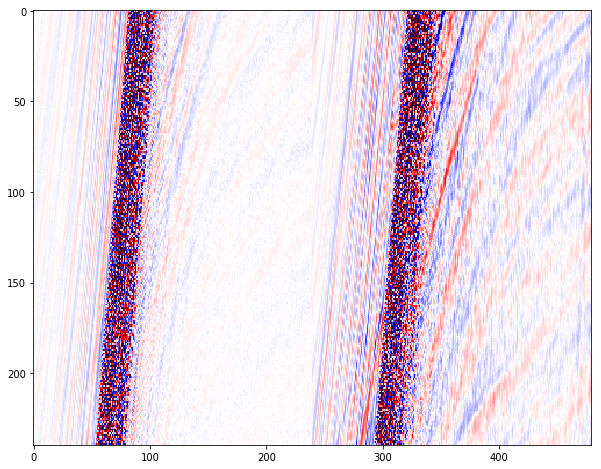

In [30]:
plt.figure(figsize=(10,8))
plt.imshow(data, vmin=-0.1, vmax=0.1, cmap=plt.cm.seismic, aspect='auto')

In [156]:
a = np.random.rand(1300, 480)
output_directory = './datasets/seismic/teeest'
output = '8.txt'
np.savetxt(os.path.join(output_directory, 'train', output), a, delimiter=",")